In [2]:
#DataChallenge2021 Banco do Brasil
#O desafio tem como objetivo a construção de um modelo analítico que fará a previsão do percentual de atendimentos acima de 15 minutos para auxiliar na criação de estratégias
#para redução do tempo de espera dos clientes.

import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina' 
from datetime import datetime
from time import gmtime, strftime
import time
import warnings
warnings.filterwarnings('ignore');
from datetime import date, time, datetime
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import statsmodels.api as sm
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error
from scipy.stats import shapiro, jarque_bera
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.gofplots import qqplot
import random


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# carregando o arquivo no drive do google
from google.colab import drive

In [4]:
# montando o drive para leitura do arquivo
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#carregando meu dataset de treino 
dataset_treino = pd.read_csv("/content/drive/My Drive/Dados/x.txt",sep=';')
dataset_treino

,ID_UOR,DT,INTERVALO,PC_ACI_PZ
0,0,2020-09-01,intervalo1,8.33
1,0,2020-09-01,intervalo2,0.00
2,0,2020-09-01,intervalo3,0.00
3,0,2020-09-01,intervalo4,0.00
4,0,2020-09-01,intervalo5,0.00
...,...,...,...,...
41620,24,2021-07-30,intervalo1,0.00
41621,24,2021-07-30,intervalo2,0.00
41622,24,2021-07-30,intervalo3,0.00
41623,24,2021-07-30,intervalo4,0.00


In [6]:
# Transformação da coluna DT no formato data time
dataset_treino['DT'] = pd.to_datetime(dataset_treino['DT'])
dataset_treino.dtypes

ID_UOR                int64
DT           datetime64[ns]
INTERVALO            object
PC_ACI_PZ           float64
dtype: object

In [7]:
dataset_treino['INTERVALO'] = dataset_treino['INTERVALO'].str.strip()

In [8]:
# travando cada UOR para verificar separadamente
ID_UOR_00 = dataset_treino.loc[dataset_treino['ID_UOR']==0]
ID_UOR_01 = dataset_treino.loc[dataset_treino['ID_UOR']==1]
ID_UOR_02 = dataset_treino.loc[dataset_treino['ID_UOR']==2]
ID_UOR_03 = dataset_treino.loc[dataset_treino['ID_UOR']==3]
ID_UOR_04 = dataset_treino.loc[dataset_treino['ID_UOR']==4]
ID_UOR_05 = dataset_treino.loc[dataset_treino['ID_UOR']==5]
ID_UOR_06 = dataset_treino.loc[dataset_treino['ID_UOR']==6]
ID_UOR_07 = dataset_treino.loc[dataset_treino['ID_UOR']==7]
ID_UOR_08 = dataset_treino.loc[dataset_treino['ID_UOR']==8]
ID_UOR_09 = dataset_treino.loc[dataset_treino['ID_UOR']==9]
ID_UOR_10 = dataset_treino.loc[dataset_treino['ID_UOR']==10]
ID_UOR_11 = dataset_treino.loc[dataset_treino['ID_UOR']==11]
ID_UOR_12 = dataset_treino.loc[dataset_treino['ID_UOR']==12]
ID_UOR_13 = dataset_treino.loc[dataset_treino['ID_UOR']==13]
ID_UOR_14 = dataset_treino.loc[dataset_treino['ID_UOR']==14]
ID_UOR_15 = dataset_treino.loc[dataset_treino['ID_UOR']==15]
ID_UOR_16 = dataset_treino.loc[dataset_treino['ID_UOR']==16]
ID_UOR_17 = dataset_treino.loc[dataset_treino['ID_UOR']==17]
ID_UOR_18 = dataset_treino.loc[dataset_treino['ID_UOR']==18]
ID_UOR_19 = dataset_treino.loc[dataset_treino['ID_UOR']==19]
ID_UOR_20 = dataset_treino.loc[dataset_treino['ID_UOR']==20]
ID_UOR_21 = dataset_treino.loc[dataset_treino['ID_UOR']==21]
ID_UOR_22 = dataset_treino.loc[dataset_treino['ID_UOR']==22]
ID_UOR_23 = dataset_treino.loc[dataset_treino['ID_UOR']==23]
ID_UOR_24 = dataset_treino.loc[dataset_treino['ID_UOR']==24]

In [9]:
#travando cada intervalo de cada uor para calcular separadamente

ID_UOR_00_INTERVALO1 = ID_UOR_00.loc[ID_UOR_00['INTERVALO']=='intervalo1']
ID_UOR_00_INTERVALO2 = ID_UOR_00.loc[ID_UOR_00['INTERVALO']=='intervalo2']
ID_UOR_00_INTERVALO3 = ID_UOR_00.loc[ID_UOR_00['INTERVALO']=='intervalo3']
ID_UOR_00_INTERVALO4 = ID_UOR_00.loc[ID_UOR_00['INTERVALO']=='intervalo4']
ID_UOR_00_INTERVALO5 = ID_UOR_00.loc[ID_UOR_00['INTERVALO']=='intervalo5']

ID_UOR_01_INTERVALO1 = ID_UOR_01.loc[ID_UOR_01['INTERVALO']=='intervalo1']
ID_UOR_01_INTERVALO2 = ID_UOR_01.loc[ID_UOR_01['INTERVALO']=='intervalo2']
ID_UOR_01_INTERVALO3 = ID_UOR_01.loc[ID_UOR_01['INTERVALO']=='intervalo3']
ID_UOR_01_INTERVALO4 = ID_UOR_01.loc[ID_UOR_01['INTERVALO']=='intervalo4']
ID_UOR_01_INTERVALO5 = ID_UOR_01.loc[ID_UOR_01['INTERVALO']=='intervalo5']

ID_UOR_02_INTERVALO1 = ID_UOR_02.loc[ID_UOR_02['INTERVALO']=='intervalo1']
ID_UOR_02_INTERVALO2 = ID_UOR_02.loc[ID_UOR_02['INTERVALO']=='intervalo2']
ID_UOR_02_INTERVALO3 = ID_UOR_02.loc[ID_UOR_02['INTERVALO']=='intervalo3']
ID_UOR_02_INTERVALO4 = ID_UOR_02.loc[ID_UOR_02['INTERVALO']=='intervalo4']
ID_UOR_02_INTERVALO5 = ID_UOR_02.loc[ID_UOR_02['INTERVALO']=='intervalo5']

ID_UOR_03_INTERVALO1 = ID_UOR_03.loc[ID_UOR_03['INTERVALO']=='intervalo1']
ID_UOR_03_INTERVALO2 = ID_UOR_03.loc[ID_UOR_03['INTERVALO']=='intervalo2']
ID_UOR_03_INTERVALO3 = ID_UOR_03.loc[ID_UOR_03['INTERVALO']=='intervalo3']
ID_UOR_03_INTERVALO4 = ID_UOR_03.loc[ID_UOR_03['INTERVALO']=='intervalo4']
ID_UOR_03_INTERVALO5 = ID_UOR_03.loc[ID_UOR_03['INTERVALO']=='intervalo5']

ID_UOR_04_INTERVALO1 = ID_UOR_04.loc[ID_UOR_04['INTERVALO']=='intervalo1']
ID_UOR_04_INTERVALO2 = ID_UOR_04.loc[ID_UOR_04['INTERVALO']=='intervalo2']
ID_UOR_04_INTERVALO3 = ID_UOR_04.loc[ID_UOR_04['INTERVALO']=='intervalo3']
ID_UOR_04_INTERVALO4 = ID_UOR_04.loc[ID_UOR_04['INTERVALO']=='intervalo4']
ID_UOR_04_INTERVALO5 = ID_UOR_04.loc[ID_UOR_04['INTERVALO']=='intervalo5']

ID_UOR_05_INTERVALO1 = ID_UOR_05.loc[ID_UOR_05['INTERVALO']=='intervalo1']
ID_UOR_05_INTERVALO2 = ID_UOR_05.loc[ID_UOR_05['INTERVALO']=='intervalo2']
ID_UOR_05_INTERVALO3 = ID_UOR_05.loc[ID_UOR_05['INTERVALO']=='intervalo3']
ID_UOR_05_INTERVALO4 = ID_UOR_05.loc[ID_UOR_05['INTERVALO']=='intervalo4']
ID_UOR_05_INTERVALO5 = ID_UOR_05.loc[ID_UOR_05['INTERVALO']=='intervalo5']

ID_UOR_06_INTERVALO1 = ID_UOR_06.loc[ID_UOR_06['INTERVALO']=='intervalo1']
ID_UOR_06_INTERVALO2 = ID_UOR_06.loc[ID_UOR_06['INTERVALO']=='intervalo2']
ID_UOR_06_INTERVALO3 = ID_UOR_06.loc[ID_UOR_06['INTERVALO']=='intervalo3']
ID_UOR_06_INTERVALO4 = ID_UOR_06.loc[ID_UOR_06['INTERVALO']=='intervalo4']
ID_UOR_06_INTERVALO5 = ID_UOR_06.loc[ID_UOR_06['INTERVALO']=='intervalo5']

ID_UOR_07_INTERVALO1 = ID_UOR_07.loc[ID_UOR_07['INTERVALO']=='intervalo1']
ID_UOR_07_INTERVALO2 = ID_UOR_07.loc[ID_UOR_07['INTERVALO']=='intervalo2']
ID_UOR_07_INTERVALO3 = ID_UOR_07.loc[ID_UOR_07['INTERVALO']=='intervalo3']
ID_UOR_07_INTERVALO4 = ID_UOR_07.loc[ID_UOR_07['INTERVALO']=='intervalo4']
ID_UOR_07_INTERVALO5 = ID_UOR_07.loc[ID_UOR_07['INTERVALO']=='intervalo5']

ID_UOR_08_INTERVALO1 = ID_UOR_08.loc[ID_UOR_08['INTERVALO']=='intervalo1']
ID_UOR_08_INTERVALO2 = ID_UOR_08.loc[ID_UOR_08['INTERVALO']=='intervalo2']
ID_UOR_08_INTERVALO3 = ID_UOR_08.loc[ID_UOR_08['INTERVALO']=='intervalo3']
ID_UOR_08_INTERVALO4 = ID_UOR_08.loc[ID_UOR_08['INTERVALO']=='intervalo4']
ID_UOR_08_INTERVALO5 = ID_UOR_08.loc[ID_UOR_08['INTERVALO']=='intervalo5']

ID_UOR_09_INTERVALO1 = ID_UOR_09.loc[ID_UOR_09['INTERVALO']=='intervalo1']
ID_UOR_09_INTERVALO2 = ID_UOR_09.loc[ID_UOR_09['INTERVALO']=='intervalo2']
ID_UOR_09_INTERVALO3 = ID_UOR_09.loc[ID_UOR_09['INTERVALO']=='intervalo3']
ID_UOR_09_INTERVALO4 = ID_UOR_09.loc[ID_UOR_09['INTERVALO']=='intervalo4']
ID_UOR_09_INTERVALO5 = ID_UOR_09.loc[ID_UOR_09['INTERVALO']=='intervalo5']

ID_UOR_10_INTERVALO1 = ID_UOR_10.loc[ID_UOR_10['INTERVALO']=='intervalo1']
ID_UOR_10_INTERVALO2 = ID_UOR_10.loc[ID_UOR_10['INTERVALO']=='intervalo2']
ID_UOR_10_INTERVALO3 = ID_UOR_10.loc[ID_UOR_10['INTERVALO']=='intervalo3']
ID_UOR_10_INTERVALO4 = ID_UOR_10.loc[ID_UOR_10['INTERVALO']=='intervalo4']
ID_UOR_10_INTERVALO5 = ID_UOR_10.loc[ID_UOR_10['INTERVALO']=='intervalo5']

ID_UOR_11_INTERVALO1 = ID_UOR_11.loc[ID_UOR_11['INTERVALO']=='intervalo1']
ID_UOR_11_INTERVALO2 = ID_UOR_11.loc[ID_UOR_11['INTERVALO']=='intervalo2']
ID_UOR_11_INTERVALO3 = ID_UOR_11.loc[ID_UOR_11['INTERVALO']=='intervalo3']
ID_UOR_11_INTERVALO4 = ID_UOR_11.loc[ID_UOR_11['INTERVALO']=='intervalo4']
ID_UOR_11_INTERVALO5 = ID_UOR_11.loc[ID_UOR_11['INTERVALO']=='intervalo5']

ID_UOR_12_INTERVALO1 = ID_UOR_12.loc[ID_UOR_12['INTERVALO']=='intervalo1']
ID_UOR_12_INTERVALO2 = ID_UOR_12.loc[ID_UOR_12['INTERVALO']=='intervalo2']
ID_UOR_12_INTERVALO3 = ID_UOR_12.loc[ID_UOR_12['INTERVALO']=='intervalo3']
ID_UOR_12_INTERVALO4 = ID_UOR_12.loc[ID_UOR_12['INTERVALO']=='intervalo4']
ID_UOR_12_INTERVALO5 = ID_UOR_12.loc[ID_UOR_12['INTERVALO']=='intervalo5']

ID_UOR_13_INTERVALO1 = ID_UOR_13.loc[ID_UOR_13['INTERVALO']=='intervalo1']
ID_UOR_13_INTERVALO2 = ID_UOR_13.loc[ID_UOR_13['INTERVALO']=='intervalo2']
ID_UOR_13_INTERVALO3 = ID_UOR_13.loc[ID_UOR_13['INTERVALO']=='intervalo3']
ID_UOR_13_INTERVALO4 = ID_UOR_13.loc[ID_UOR_13['INTERVALO']=='intervalo4']
ID_UOR_13_INTERVALO5 = ID_UOR_13.loc[ID_UOR_13['INTERVALO']=='intervalo5']

ID_UOR_14_INTERVALO1 = ID_UOR_14.loc[ID_UOR_14['INTERVALO']=='intervalo1']
ID_UOR_14_INTERVALO2 = ID_UOR_14.loc[ID_UOR_14['INTERVALO']=='intervalo2']
ID_UOR_14_INTERVALO3 = ID_UOR_14.loc[ID_UOR_14['INTERVALO']=='intervalo3']
ID_UOR_14_INTERVALO4 = ID_UOR_14.loc[ID_UOR_14['INTERVALO']=='intervalo4']
ID_UOR_14_INTERVALO5 = ID_UOR_14.loc[ID_UOR_14['INTERVALO']=='intervalo5']

ID_UOR_15_INTERVALO1 = ID_UOR_15.loc[ID_UOR_15['INTERVALO']=='intervalo1']
ID_UOR_15_INTERVALO2 = ID_UOR_15.loc[ID_UOR_15['INTERVALO']=='intervalo2']
ID_UOR_15_INTERVALO3 = ID_UOR_15.loc[ID_UOR_15['INTERVALO']=='intervalo3']
ID_UOR_15_INTERVALO4 = ID_UOR_15.loc[ID_UOR_15['INTERVALO']=='intervalo4']
ID_UOR_15_INTERVALO5 = ID_UOR_15.loc[ID_UOR_15['INTERVALO']=='intervalo5']

ID_UOR_16_INTERVALO1 = ID_UOR_16.loc[ID_UOR_16['INTERVALO']=='intervalo1']
ID_UOR_16_INTERVALO2 = ID_UOR_16.loc[ID_UOR_16['INTERVALO']=='intervalo2']
ID_UOR_16_INTERVALO3 = ID_UOR_16.loc[ID_UOR_16['INTERVALO']=='intervalo3']
ID_UOR_16_INTERVALO4 = ID_UOR_16.loc[ID_UOR_16['INTERVALO']=='intervalo4']
ID_UOR_16_INTERVALO5 = ID_UOR_16.loc[ID_UOR_16['INTERVALO']=='intervalo5']

ID_UOR_17_INTERVALO1 = ID_UOR_17.loc[ID_UOR_17['INTERVALO']=='intervalo1']
ID_UOR_17_INTERVALO2 = ID_UOR_17.loc[ID_UOR_17['INTERVALO']=='intervalo2']
ID_UOR_17_INTERVALO3 = ID_UOR_17.loc[ID_UOR_17['INTERVALO']=='intervalo3']
ID_UOR_17_INTERVALO4 = ID_UOR_17.loc[ID_UOR_17['INTERVALO']=='intervalo4']
ID_UOR_17_INTERVALO5 = ID_UOR_17.loc[ID_UOR_17['INTERVALO']=='intervalo5']

ID_UOR_18_INTERVALO1 = ID_UOR_18.loc[ID_UOR_18['INTERVALO']=='intervalo1']
ID_UOR_18_INTERVALO2 = ID_UOR_18.loc[ID_UOR_18['INTERVALO']=='intervalo2']
ID_UOR_18_INTERVALO3 = ID_UOR_18.loc[ID_UOR_18['INTERVALO']=='intervalo3']
ID_UOR_18_INTERVALO4 = ID_UOR_18.loc[ID_UOR_18['INTERVALO']=='intervalo4']
ID_UOR_18_INTERVALO5 = ID_UOR_18.loc[ID_UOR_18['INTERVALO']=='intervalo5']

ID_UOR_19_INTERVALO1 = ID_UOR_19.loc[ID_UOR_19['INTERVALO']=='intervalo1']
ID_UOR_19_INTERVALO2 = ID_UOR_19.loc[ID_UOR_19['INTERVALO']=='intervalo2']
ID_UOR_19_INTERVALO3 = ID_UOR_19.loc[ID_UOR_19['INTERVALO']=='intervalo3']
ID_UOR_19_INTERVALO4 = ID_UOR_19.loc[ID_UOR_19['INTERVALO']=='intervalo4']
ID_UOR_19_INTERVALO5 = ID_UOR_19.loc[ID_UOR_19['INTERVALO']=='intervalo5']

ID_UOR_20_INTERVALO1 = ID_UOR_20.loc[ID_UOR_20['INTERVALO']=='intervalo1']
ID_UOR_20_INTERVALO2 = ID_UOR_20.loc[ID_UOR_20['INTERVALO']=='intervalo2']
ID_UOR_20_INTERVALO3 = ID_UOR_20.loc[ID_UOR_20['INTERVALO']=='intervalo3']
ID_UOR_20_INTERVALO4 = ID_UOR_20.loc[ID_UOR_20['INTERVALO']=='intervalo4']
ID_UOR_20_INTERVALO5 = ID_UOR_20.loc[ID_UOR_20['INTERVALO']=='intervalo5']

ID_UOR_21_INTERVALO1 = ID_UOR_21.loc[ID_UOR_21['INTERVALO']=='intervalo1']
ID_UOR_21_INTERVALO2 = ID_UOR_21.loc[ID_UOR_21['INTERVALO']=='intervalo2']
ID_UOR_21_INTERVALO3 = ID_UOR_21.loc[ID_UOR_21['INTERVALO']=='intervalo3']
ID_UOR_21_INTERVALO4 = ID_UOR_21.loc[ID_UOR_21['INTERVALO']=='intervalo4']
ID_UOR_21_INTERVALO5 = ID_UOR_21.loc[ID_UOR_21['INTERVALO']=='intervalo5']

ID_UOR_22_INTERVALO1 = ID_UOR_22.loc[ID_UOR_22['INTERVALO']=='intervalo1']
ID_UOR_22_INTERVALO2 = ID_UOR_22.loc[ID_UOR_22['INTERVALO']=='intervalo2']
ID_UOR_22_INTERVALO3 = ID_UOR_22.loc[ID_UOR_22['INTERVALO']=='intervalo3']
ID_UOR_22_INTERVALO4 = ID_UOR_22.loc[ID_UOR_22['INTERVALO']=='intervalo4']
ID_UOR_22_INTERVALO5 = ID_UOR_22.loc[ID_UOR_22['INTERVALO']=='intervalo5']

ID_UOR_23_INTERVALO1 = ID_UOR_23.loc[ID_UOR_23['INTERVALO']=='intervalo1']
ID_UOR_23_INTERVALO2 = ID_UOR_23.loc[ID_UOR_23['INTERVALO']=='intervalo2']
ID_UOR_23_INTERVALO3 = ID_UOR_23.loc[ID_UOR_23['INTERVALO']=='intervalo3']
ID_UOR_23_INTERVALO4 = ID_UOR_23.loc[ID_UOR_23['INTERVALO']=='intervalo4']
ID_UOR_23_INTERVALO5 = ID_UOR_23.loc[ID_UOR_23['INTERVALO']=='intervalo5']

ID_UOR_24_INTERVALO1 = ID_UOR_24.loc[ID_UOR_24['INTERVALO']=='intervalo1']
ID_UOR_24_INTERVALO2 = ID_UOR_24.loc[ID_UOR_24['INTERVALO']=='intervalo2']
ID_UOR_24_INTERVALO3 = ID_UOR_24.loc[ID_UOR_24['INTERVALO']=='intervalo3']
ID_UOR_24_INTERVALO4 = ID_UOR_24.loc[ID_UOR_24['INTERVALO']=='intervalo4']
ID_UOR_24_INTERVALO5 = ID_UOR_24.loc[ID_UOR_24['INTERVALO']=='intervalo5']

In [10]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')
import numpy as np
import statsmodels.api as sm

In [11]:
#mudando os nomes das colunas para padrão facebook prophet
calculo = ID_UOR_01_INTERVALO1
facebook =  calculo[['DT','PC_ACI_PZ']]
facebook = facebook.rename(columns={'DT': 'ds'})
facebook = facebook.rename(columns={'PC_ACI_PZ': 'y'})
facebook


,ds,y
1665,2020-09-01,12.50
1670,2020-09-02,0.00
1675,2020-09-03,13.51
1680,2020-09-04,5.41
1685,2020-09-05,0.00
...,...,...
3305,2021-07-26,0.00
3310,2021-07-27,0.00
3315,2021-07-28,10.34
3320,2021-07-29,0.00


In [12]:
#testando as previsões em uma uor especifica
modelo1=Prophet(changepoint_prior_scale= 0.5,
                      n_changepoints = 200,
                      seasonality_mode = 'additive',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
  
modelo1.fit(facebook)

futuro=modelo1.make_future_dataframe(periods=22, freq='B')
previsoes=modelo1.predict(futuro)

from fbprophet.plot import add_changepoints_to_plot

In [ ]:
forecast = modelo1.predict(futuro) 
x = forecast[['ds', 'yhat']].tail(22)
x

,ds,yhat
333,2021-08-02,7.424063
334,2021-08-03,4.212922
335,2021-08-04,5.440552
336,2021-08-05,9.348337
337,2021-08-06,9.620581
338,2021-08-09,13.444457
339,2021-08-10,10.243883
340,2021-08-11,11.329770
341,2021-08-12,14.951176
342,2021-08-13,14.803523


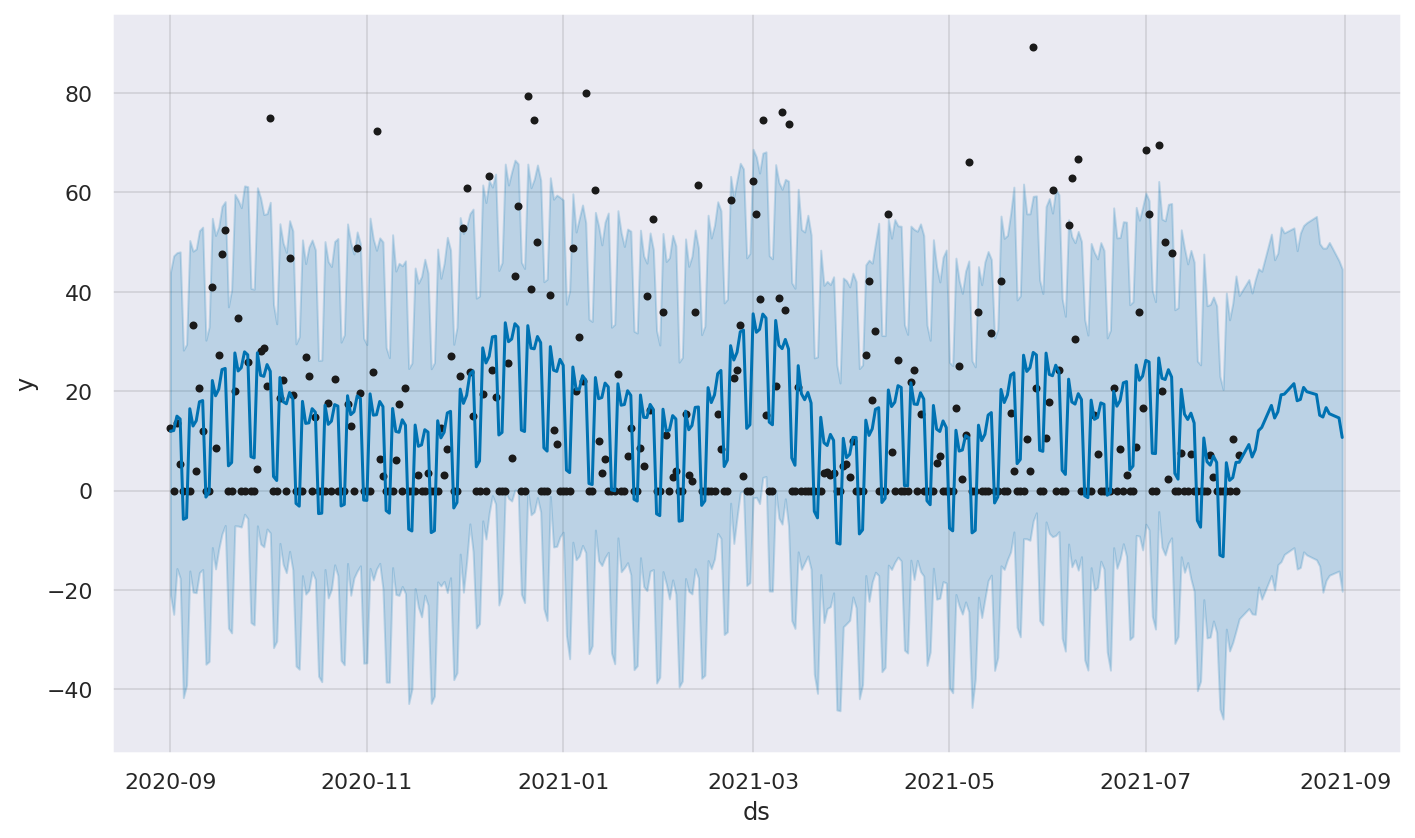

In [ ]:
fig1 = modelo1.plot(forecast)

In [13]:

#função para calcular todas as previsões de todos os intervalos de tempo
lista = [ID_UOR_00,ID_UOR_01,ID_UOR_02,ID_UOR_04,ID_UOR_05,ID_UOR_06,ID_UOR_07,ID_UOR_08,
         ID_UOR_09,ID_UOR_10,ID_UOR_11,ID_UOR_12,ID_UOR_13,ID_UOR_14,ID_UOR_15,ID_UOR_16,ID_UOR_17,
         ID_UOR_18,ID_UOR_19,ID_UOR_20,ID_UOR_21,ID_UOR_22,ID_UOR_23,ID_UOR_24]
variuor= 0

for i in lista:
   
  from datetime import timedelta, date

  def daterange_2(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

  start_date1 = date(2021, 8, 2)
  end_date1 = date(2021, 8,24)

  datainicial1 = '2021-08-02'


  calculo1 = i.loc[i['INTERVALO']=='intervalo1']
  facebook1 =  calculo1[['DT','PC_ACI_PZ']]
  facebook1 = facebook1.rename(columns={'DT': 'ds'})
  facebook1 = facebook1.rename(columns={'PC_ACI_PZ': 'y'})
  modelox1=Prophet(changepoint_prior_scale= 0.2,
                      seasonality_mode = 'additive',
                      daily_seasonality = False,
                      weekly_seasonality=True,
                      yearly_seasonality = False,
                      interval_width=0.95,
                      uncertainty_samples=1200,
                      seasonality_prior_scale=0.5,
                      mcmc_samples=30
                      )
  modelox1.fit(facebook1)


  calculo2 = i.loc[i['INTERVALO']=='intervalo2']
  facebook2 =  calculo2[['DT','PC_ACI_PZ']]
  facebook2 = facebook2.rename(columns={'DT': 'ds'})
  facebook2 = facebook2.rename(columns={'PC_ACI_PZ': 'y'})
  modelox2=Prophet(changepoint_prior_scale= 0.2,
                      seasonality_mode = 'additive',
                      daily_seasonality = False,
                      weekly_seasonality=True,
                      yearly_seasonality = False,
                      interval_width=0.95,
                      uncertainty_samples=1200,
                      seasonality_prior_scale=0.5,
                      mcmc_samples=30
                      )
  modelox2.fit(facebook2)

  calculo3 = i.loc[i['INTERVALO']=='intervalo3']
  facebook3 =  calculo3[['DT','PC_ACI_PZ']]
  facebook3 = facebook3.rename(columns={'DT': 'ds'})
  facebook3 = facebook3.rename(columns={'PC_ACI_PZ': 'y'})
  modelox3=Prophet(changepoint_prior_scale= 0.2,
                      seasonality_mode = 'additive',
                      daily_seasonality = False,
                      weekly_seasonality=True,
                      yearly_seasonality = False,
                      interval_width=0.95,
                      uncertainty_samples=1200,
                      seasonality_prior_scale=0.5,
                      mcmc_samples=30
                      )
  modelox3.fit(facebook3)

  calculo4 = i.loc[i['INTERVALO']=='intervalo4']
  facebook4 =  calculo4[['DT','PC_ACI_PZ']]
  facebook4 = facebook4.rename(columns={'DT': 'ds'})
  facebook4 = facebook4.rename(columns={'PC_ACI_PZ': 'y'})
  modelox4=Prophet(changepoint_prior_scale= 0.2,
                      seasonality_mode = 'additive',
                      daily_seasonality = False,
                      weekly_seasonality=True,
                      yearly_seasonality = False,
                      interval_width=0.95,
                      uncertainty_samples=1200,
                      seasonality_prior_scale=0.5,
                      mcmc_samples=30
                      )
  modelox4.fit(facebook4)

  calculo5 = i.loc[i['INTERVALO']=='intervalo5']
  facebook5 =  calculo5[['DT','PC_ACI_PZ']]
  facebook5 = facebook5.rename(columns={'DT': 'ds'})
  facebook5 = facebook5.rename(columns={'PC_ACI_PZ': 'y'})
  modelox5=Prophet(changepoint_prior_scale= 0.2,
                      seasonality_mode = 'additive',
                      daily_seasonality = False,
                      weekly_seasonality=True,
                      yearly_seasonality = False,
                      interval_width=0.95,
                      uncertainty_samples=1200,
                      seasonality_prior_scale=0.5,
                      mcmc_samples=30
                      )
  modelox5.fit(facebook5)




  periodoprevisao = 1


  for single_date in daterange_2(start_date1, end_date1):
    datainicial_temp1 = datainicial1

    futuro1=modelox1.make_future_dataframe(periods= periodoprevisao, freq='B')
    previsoes1=modelox1.predict(futuro1)  
    forecast1 = modelox1.predict(futuro1) 
    xx1 = forecast1['ds'].tail(1)
    xxx1 = forecast1['yhat'].tail(1)
    xxx1= np.around(xxx1.values,2)
    if xxx1<0:
       xxx1=0
       print(xxx1)
    elif xxx1>30:
      xxx1=np.around(xxx1,0)
      xxx1= random.randint(1,xxx1)
      print(xxx1)  
    else:
      xxx1=np.around(xxx1,2)
      print(*xxx1)

    futuro2=modelox2.make_future_dataframe(periods= periodoprevisao, freq='B')
    previsoes2=modelox2.predict(futuro2)  
    forecast2 = modelox2.predict(futuro2) 
    xx2 = forecast2['ds'].tail(1)
    xxx2 = forecast2['yhat'].tail(1)
    xxx2 = np.around(xxx2.values,2)
    if xxx2<0:
       xxx2=0
       print(xxx2)
    elif xxx2>30:
      xxx2 = np.around(xxx2,0)
      xxx2 = random.randint(1,xxx2)
      print(xxx2) 
    else:
      xxx2=np.around(xxx2,2)
      print(*xxx2)

  
    futuro3=modelox3.make_future_dataframe(periods= periodoprevisao, freq='B')
    previsoes3=modelox3.predict(futuro3)  
    forecast3 = modelox3.predict(futuro3) 
    xx3 = forecast3['ds'].tail(1)
    xxx3 = forecast3['yhat'].tail(1)
    xxx3= np.around(xxx3.values,2)
    if xxx3<0:
      xxx3=0
      print(xxx3)
    elif xxx3>30:
      xxx3=np.around(xxx3,0)
      xxx3= random.randint(1,xxx3)
      print(xxx3)
    else:
      xxx3=np.around(xxx3,2)
      print(*xxx3)

    futuro4=modelox4.make_future_dataframe(periods= periodoprevisao, freq='B')
    previsoes4=modelox4.predict(futuro4)  
    forecast4 = modelox4.predict(futuro4) 
    xx4 = forecast4['ds'].tail(1)
    xxx4 = forecast4['yhat'].tail(1)
    xxx4 = np.around(xxx4.values,2)
    if xxx4<0:
      xxx4 = 0
      print(xxx4)
    elif xxx4>30:
      xxx4=np.around(xxx4,0)
      xxx4= random.randint(1,xxx4)
      print(xxx4)
    else:
      xxx4=np.around(xxx4,2)
      print(*xxx4)

    futuro5=modelox5.make_future_dataframe(periods= periodoprevisao, freq='B')
    previsoes5=modelox5.predict(futuro5)  
    forecast5 = modelox5.predict(futuro5) 
    xx5 = forecast5['ds'].tail(1)
    xxx5 = forecast5['yhat'].tail(1)
    xxx5 = np.around(xxx5.values,2)
    if xxx5<0:
      xxx5 = 0
      print(xxx5)
    elif xxx5>30
    :
      xxx5=np.around(xxx5,0)
      xxx5= random.randint(1,xxx5)
      print(xxx5)
    else:
      xxx5=np.around(xxx5,2)
      print(*xxx5)

    datainicial_temp1 = datetime.strptime(str(datainicial_temp1), "%Y-%m-%d").date()
    datainicial1 = datainicial_temp1 + timedelta(days=1)
    datainicial1 =str(datainicial1)
  
    periodoprevisao = periodoprevisao + 1

  variuor=variuor + 1

4.83
4.2
10.54
8.24
4.17
5.5
5.77
9.05
8.89
2.9
4.93
3.83
9.28
9.06
2.48
4.4
2.9
7.82
8.16
1.59
6.28
2.93
7.38
7.29
2.33
4.84
4.04
10.75
8.45
4.25
5.52
5.61
9.26
9.1
2.98
4.95
3.68
9.49
9.27
2.57
4.41
2.74
8.03
8.38
1.68
6.29
2.78
7.59
7.5
2.41
4.85
3.89
10.95
8.67
4.33
5.53
5.45
9.46
9.32
3.07
4.96
3.52
9.7
9.48
2.65
4.42
2.59
8.24
8.59
1.76
6.3
2.62
7.8
7.72
2.49
4.86
3.73
11.16
8.88
4.42
5.54
5.3
9.67
9.53
3.15
4.97
3.36
9.9
9.7
2.73
4.43
2.43
8.45
8.8
1.84
6.31
2.46
8.0
7.93
2.58
4.88
3.57
11.37
9.09
4.5
5.55
5.14
9.88
9.74
3.23


17.06
21.38
20.11
21.7
16.03
13.72
15.17
14.97
20.31
16.27
13.53
19.06
12.17
17.09
12.5
16.87
23.68
17.11
13.51
11.19
16.27
21.65
15.5
22.3
14.15
16.81
21.53
20.44
22.1
16.51
13.47
15.32
15.29
20.7
16.75
13.29
19.2
12.5
17.49
12.98
16.62
23.83
17.44
13.91
11.67
16.03
21.8
15.82
22.7
14.63
16.57
21.68
20.76
22.5
16.99
13.22
15.46
15.61
21.1
17.22
13.04
19.35
12.82
17.88
13.45
16.38
23.97
17.76
14.3
12.15
15.78
21.94
16.15
23.09
15.11
16.32
21.82
21.08
22.89
17.47
12.98
15.61
15.93
21.5
17.7
12.79
19.5
13.14
18.28
13.93
16.13
24.12
18.08
14.7
12.63
15.53
22.09
16.47
23.49
15.58
16.07
21.97
21.41
23.29
17.94
12.73
15.76
16.26
21.89
18.18


3.09
3.93
3.15
4.14
2.1
2.34
1.87
1.33
2.28
0.25
2.95
2.34
1.01
3.91
0.3
6.97
1.34
3.52
3.92
0.8
4.26
2.6
1.91
3.11
0.33
3.08
3.6
2.9
4.16
2.0
2.33
1.54
1.08
2.3
0.15
2.94
2.01
0.75
3.93
0.2
6.96
1.01
3.27
3.94
0.69
4.25
2.27
1.65
3.13
0.23
3.07
3.27
2.65
4.18
1.89
2.32
1.21
0.83
2.32
0.05
2.93
1.69
0.5
3.95
0.1
6.95
0.68
3.02
3.96
0.59
4.24
1.94
1.4
3.15
0.13
3.06
2.94
2.4
4.2
1.79
2.31
0.88
0.58
2.34
0
2.92
1.36
0.25
3.97
0.0
6.94
0.35
2.77
3.98
0.49
4.23
1.62
1.15
3.17
0.03
3.05
2.61
2.15
4.22
1.69
2.3
0.55
0.32
2.36
0


10.04
7.57
10.35
13.66
8.68
10.46
7.95
10.65
9.65
7.28
7.69
5.6
5.67
12.75
9.85
10.36
9.0
1.68
11.79
8.97
10.59
6.64
8.42
15.13
11.71
10.08
7.29
10.16
13.87
8.9
10.5
7.66
10.46
9.85
7.51
7.73
5.31
5.49
12.95
10.07
10.4
8.72
1.5
11.99
9.2
10.63
6.35
8.23
15.33
11.93
10.13
7.01
9.98
14.07
9.13
10.54
7.38
10.28
10.05
7.73
7.78
5.03
5.3
13.15
10.3
10.44
8.43
1.31
12.19
9.42
10.68
6.07
8.04
15.53
12.16
10.17
6.73
9.79
14.27
9.35
10.59
7.1
10.09
10.25
7.95
7.82
4.75
5.11
13.35
10.52
10.49
8.15
1.12
12.39
9.64
10.72
5.79
7.86
15.74
12.38
10.21
6.44
9.61
14.47
9.58
10.63
6.82
9.9
10.45
8.18


12.82
20.54
23.25
31
9
12.67
16.95
19.39
27.87
24.5
12.86
16.35
17.53
21.02
18.38
13.36
17.06
21.52
29.3
22.64
10.99
14.6
18.71
24.42
27.46
13.62
21.24
24.37
17
9
13.47
17.66
20.51
29.03
25.5
13.66
17.06
18.65
22.18
19.38
14.16
17.76
22.63
20
23.64
11.79
15.3
19.83
25.58
28.46
14.43
21.95
25.48
33
6
14.28
18.36
21.62
5
26.49
14.46
17.76
19.76
23.34
20.38
14.96
18.47
23.75
5
24.63
12.59
16.01
20.94
26.74
29.45
15.23
22.65
26.6
27
29
15.08
19.07
22.73
20
27.49
15.27
18.47
20.88
24.5
21.37
15.76
19.18
24.86
27
25.63
13.39
16.71
22.06
27.9
14
16.03
23.36
27.71
15
9
15.88
19.77
23.85
16
28.49


14.92
7.24
21.91
20.21
19.86
12.66
9.32
26.32
27.9
23.27
14.54
15.87
24.83
21.45
23.52
10.8
5.8
18.44
18.18
18.38
12.3
13.15
22.68
20.55
19.17
14.66
5.83
21.69
19.92
20.08
12.4
7.92
26.1
27.6
23.49
14.28
14.46
24.61
21.16
23.74
10.55
4.39
18.22
17.89
18.6
12.04
11.74
22.46
20.26
19.39
14.4
4.43
21.47
19.62
20.3
12.15
6.52
25.88
27.31
23.71
14.03
13.06
24.39
20.86
23.96
10.29
2.99
18.0
17.59
18.82
11.78
10.34
22.24
19.96
19.61
14.15
3.03
21.25
19.33
20.52
11.89
5.11
25.66
27.01
23.93
13.77
11.66
24.17
20.57
24.18
10.03
1.58
17.78
17.3
19.04
11.53
8.93
22.02
19.67
19.82
13.89
1.62
21.03
19.03
20.74
11.63
3.71
25.44
26.72
24.15


0.26
0.0
0.57
0.0
0
0.32
0.0
0.53
0.0
0
0.3
0.0
0.57
0.0
0
0.34
0.0
0.77
0.0
0
0.71
0.0
0.89
0.0
1.73
0.28
0.0
0.63
0.0
0
0.35
0.0
0.58
0.0
0
0.32
0.0
0.62
0.0
0
0.36
0.0
0.82
0.0
0
0.73
0.0
0.94
0.0
1.74
0.3
0.0
0.68
0.0
0
0.37
0.0
0.63
0.0
0
0.34
0.0
0.67
0.0
0
0.38
0.0
0.88
0.0
0
0.75
0.0
0.99
0.0
1.74
0.32
0.0
0.73
0.0
0
0.39
0.0
0.68
0.0
0
0.37
0.0
0.73
0.0
0
0.41
0.0
0.93
0.0
0
0.77
0.0
1.04
0.0
1.75
0.34
0.0
0.78
0.0
0
0.41
0.0
0.74
0.0
0


9.47
18.23
13.5
19.39
0.07
9.29
19.07
15.16
29.26
4.83
12.43
21.89
21.17
29.11
6.03
11.69
24.47
23.81
26.06
8.32
11.02
24.67
18.67
28.03
4.03
9.85
17.71
12.58
19.33
0
9.68
18.56
14.25
29.2
3.43
12.82
21.38
20.25
29.05
4.63
12.08
23.96
22.89
26.0
6.92
11.4
24.16
17.76
27.97
2.63
10.24
17.2
11.67
19.27
0
10.07
18.04
13.33
29.13
2.04
13.2
20.86
19.34
28.99
3.24
12.46
23.44
21.98
25.94
5.53
11.79
23.64
16.84
27.91
1.24
10.62
16.69
10.76
19.21
0
10.45
17.53
12.42
29.07
0.64
13.59
20.35
18.43
28.93
1.85
12.85
22.93
21.07
25.88
4.14
12.17
23.13
15.93
27.85
0
11.01
16.17
9.85
19.15
0
10.84
17.02
11.51
29.01
0


2.27
8.1
6.35
1.96
0.85
3.49
5.54
5.55
1.04
0
6.33
4.86
4.29
2.52
1.74
4.77
7.8
6.3
4.07
0.93
4.07
8.66
3.91
1.65
0
2.4
8.59
6.34
1.9
0.64
3.61
6.02
5.54
0.98
0
6.46
5.34
4.28
2.46
1.54
4.9
8.28
6.29
4.01
0.73
4.2
9.15
3.9
1.59
0
2.53
9.07
6.33
1.83
0.44
3.74
6.5
5.53
0.91
0
6.58
5.82
4.27
2.39
1.33
5.03
8.76
6.28
3.94
0.53
4.33
9.63
3.89
1.52
0
2.66
9.55
6.32
1.77
0.24
3.87
6.99
5.52
0.85
0
6.71
6.31
4.26
2.33
1.13
5.15
9.25
6.27
3.88
0.32
4.46
10.11
3.88
1.46
0
2.78
10.04
6.3
1.7
0.04
4.0
7.47
5.5
0.78
0


0.13
0.21
0.45
0
0
0.22
1.73
2.35
0
0
0.15
0.0
0.96
0.32
0.25
0.46
0
0.36
0.91
0
0.1
1.47
2.37
0.0
0
0.12
0.23
0.55
0
0
0.21
1.75
2.45
0
0
0.13
0.02
1.06
0.32
0.02
0.45
0
0.46
0.91
0
0.09
1.49
2.47
0.0
0
0.11
0.24
0.64
0
0
0.19
1.76
2.54
0
0
0.12
0.04
1.15
0.32
0
0.43
0
0.55
0.91
0
0.07
1.51
2.56
0.0
0
0.09
0.26
0.74
0
0
0.18
1.78
2.64
0
0
0.11
0.06
1.25
0.32
0
0.42
0
0.65
0.91
0
0.06
1.53
2.66
0.0
0
0.08
0.28
0.83
0
0
0.17
1.8
2.73
0
0


3.34
0.64
2.31
1.43
1.61
3.04
0.66
1.46
2.25
1.49
6.57
1.51
0.59
0
0
5.62
1.84
1.2
0
0
3.81
2.6
3.43
0.35
0.98
3.79
0.67
2.34
1.27
1.47
3.48
0.68
1.49
2.1
1.35
7.02
1.53
0.62
0
0
6.07
1.86
1.23
0
0
4.26
2.63
3.46
0.2
0.84
4.24
0.69
2.37
1.12
1.33
3.93
0.71
1.52
1.95
1.21
7.47
1.56
0.65
0
0
6.52
1.89
1.26
0
0
4.71
2.65
3.49
0.05
0.7
4.69
0.72
2.4
0.97
1.19
4.38
0.74
1.55
1.79
1.07
7.92
1.58
0.67
0
0
6.97
1.91
1.28
0
0
5.15
2.68
3.52
0
0.55
5.14
0.75
2.43
0.81
1.04
4.83
0.76
1.57
1.64
0.93


0.29
0
0.62
0.09
0.27
0.55
0.24
2.63
0.45
0.16
1.09
0
0.62
0.2
0.05
0.15
0
0.44
0.48
0.13
2.66
0
0.98
0.2
1.94
0.33
0
0.71
0.11
0.3
0.59
0.22
2.72
0.47
0.19
1.13
0
0.71
0.21
0.08
0.19
0
0.53
0.49
0.16
2.7
0
1.06
0.21
1.97
0.37
0
0.8
0.12
0.34
0.63
0.21
2.81
0.48
0.22
1.17
0
0.8
0.23
0.11
0.23
0
0.62
0.51
0.19
2.74
0
1.15
0.23
2.0
0.41
0
0.88
0.14
0.37
0.67
0.19
2.89
0.5
0.25
1.22
0
0.89
0.24
0.14
0.27
0
0.7
0.52
0.22
2.78
0
1.24
0.24
2.03
0.45
0
0.97
0.15
0.4
0.71
0.17
2.98
0.51
0.28


0.0
0.33
0.13
0
0
0.0
0.08
0
0
0.13
0.0
0
0
0
0
0.0
0.07
0
0
0
0.0
0
0.6
0.68
0.21
0.0
0.31
0.13
0
0
0.0
0.06
0
0
0.13
0.0
0
0
0
0
0.0
0.05
0
0
0
0.0
0
0.59
0.66
0.21
0.0
0.3
0.12
0
0
0.0
0.05
0
0
0.13
0.0
0
0
0
0
0.0
0.04
0
0
0
0.0
0
0.58
0.63
0.21
0.0
0.28
0.11
0
0
0.0
0.03
0
0
0.12
0.0
0
0
0
0
0.0
0.02
0
0
0
0.0
0
0.58
0.61
0.21
0.0
0.27
0.11
0
0
0.0
0.02
0
0
0.12


2.28
6.29
10.1
8.39
12.32
7.13
3.18
7.65
7.71
9.94
2.65
1.4
7.95
9.35
11.83
2.6
1.99
9.21
7.34
10.52
2.37
4.1
9.46
10.65
12.78
2.5
6.5
10.88
9.16
13.3
7.36
3.39
8.43
8.48
10.92
2.88
1.61
8.73
10.13
12.81
2.83
2.2
10.0
8.11
11.51
2.59
4.31
10.24
11.43
13.76
2.73
6.72
11.66
9.94
14.28
7.58
3.61
9.21
9.26
11.9
3.1
1.83
9.51
10.9
13.8
3.05
2.42
10.78
8.89
12.49
2.82
4.53
11.03
12.2
14.74
2.96
6.94
12.45
10.71
15.26
7.81
3.83
10.0
10.03
12.88
3.33
2.05
10.3
11.68
14.78
3.28
2.64
11.56
9.66
13.47
3.05
4.75
11.81
12.98
15.72
3.18
7.15
13.23
11.49
16.24
8.04
4.04
10.78
10.81
13.86


9.56
13.07
14.96
13.18
13.87
10.43
13.82
6.58
5.06
4.86
9.26
11.75
11.21
5.13
5.16
6.84
9.7
8.02
3.07
7.26
8.07
19.62
15.28
10.39
8.36
9.7
13.21
14.44
11.8
13.46
10.57
13.95
6.06
3.68
4.45
9.41
11.89
10.7
3.75
4.75
6.99
9.83
7.5
1.68
6.85
8.21
19.76
14.77
9.01
7.95
9.85
13.34
13.92
10.41
13.05
10.72
14.09
5.54
2.3
4.04
9.55
12.02
10.18
2.37
4.34
7.13
9.96
6.99
0.3
6.44
8.36
19.89
14.25
7.63
7.54
9.99
13.47
13.41
9.03
12.64
10.87
14.22
5.03
0.91
3.63
9.7
12.15
9.67
0.98
3.93
7.28
10.1
6.47
0
6.03
8.5
20.03
13.73
6.25
7.13
10.14
13.61
12.89
7.65
12.23
11.01
14.36
4.51
0
3.22


0
0
0.33
1.0
0
0
0
0
0.32
0.07
0
0
0
0.74
0
1.32
3.02
0
0.35
0.88
0
0
0
0.2
0
0
0
0.07
0.88
0
0
0
0
0.21
0.06
0
0
0
0.62
0
1.15
2.7
0
0.23
0.87
0
0
0
0.08
0
0
0
0
0.77
0
0
0
0
0.1
0.04
0
0
0
0.51
0
0.98
2.37
0
0.12
0.86
0
0
0
0
0
0
0
0
0.66
0
0
0
0
0
0.03
0
0
0
0.4
0
0.82
2.05
0
0.0
0.85
0
0
0
0
0
0
0
0
0.54
0
0
0
0
0
0.02
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.59
0.23
1.07
1.04
3.12
0.58
0.69
0.89
1.19
2.77
0.34
0.1
0.01
1.15
2.74
0.26
0.84
2.15
1.54
1.75
0.41
0.27
1.27
0.63
3.36
0.62
0.23
1.12
1.14
3.28
0.6
0.69
0.94
1.28
2.92
0.36
0.1
0.06
1.24
2.89
0.28
0.84
2.2
1.63
1.91
0.43
0.27
1.32
0.72
3.51
0.64
0.24
1.17
1.23
3.43
0.62
0.69
0.99
1.37
3.08
0.38
0.1
0.11
1.33
3.04
0.31
0.84
2.25
1.72
2.06
0.45
0.27
1.37
0.81
3.66
0.67
0.24
1.23
1.32
3.58
0.65
0.7
1.05
1.46
3.23
0.41
0.1
0.16
1.43
3.19
0.33
0.85
2.3
1.81
2.21
0.48
0.27
1.42
0.9
3.81
0.69
0.24
1.28
1.41
3.73
0.67
0.7
1.1
1.55
3.38


2
17
35
25
26.0
28.54
27.52
23
27.22
23.74
27.85
22.94
12
25.01
22.81
28.66
24.63
33
29.36
23.99
29.71
27.08
13
29.44
23.32
24
3
24
2
27.33
27
27.95
1
28.23
25.07
29.42
23.37
15
26.01
24.14
18
25.06
3
22
25.32
18
27.51
26
10
24.65
32
23
12
9
28.66
12
28.37
29
29.23
26.4
15
23.8
7
27.02
25.48
23
25.49
35
2
26.66
6
27.94
23
31
25.98
33
33
31
26
30.0
1
28.8
42
2
27.73
19
24.23
33
28.02
26.81
30
25.92
12
11
27.99
1
28.36
1
7
27.31
37
36
17
33
25
30
29.23
23
16
29.06


0.0
0
1.43
0.65
0
0.0
0.08
0
0
0
0.0
0
0.0
-0.0
0.8
0.0
0.54
0.3
0.17
0.03
0.0
0
0
0
0
0.0
0
1.43
0.6
0
0.0
-0.0
0
0
0
0.0
0
0.01
0
0.8
0.0
0.46
0.31
0.12
0.02
0.0
0
0
0
0
0.0
0
1.44
0.56
0
0.0
0
0
0
0
0.0
0
0.01
0
0.79
0.0
0.38
0.31
0.08
0.02
0.0
0
0
0
0
0.0
0
1.45
0.51
0
0.0
0
0
0
0
0.0
0
0.02
0
0.79
0.0
0.3
0.32
0.03
0.01
0.0
0
0
0
0
0.0
0
1.45
0.46
0
0.0
0
0
0
0


1.72
2.72
4.11
5.71
3.24
0.25
2.2
9.46
8.71
7.82
0.66
1.43
4.08
4.53
2.96
0.31
2.54
5.79
4.09
0.33
2.45
0.49
3.12
3.05
1.75
1.65
2.6
4.27
5.98
3.21
0.18
2.09
9.61
8.98
7.79
0.59
1.32
4.24
4.8
2.93
0.24
2.43
5.95
4.36
0.3
2.37
0.38
3.28
3.32
1.72
1.58
2.49
4.42
6.26
3.18
0.11
1.98
9.77
9.26
7.76
0.52
1.2
4.39
5.07
2.9
0.17
2.32
6.11
4.63
0.27
2.3
0.27
3.43
3.6
1.69
1.51
2.38
4.58
6.53
3.15
0.04
1.86
9.92
9.53
7.73
0.45
1.09
4.55
5.35
2.87
0.1
2.21
6.26
4.9
0.24
2.23
0.15
3.59
3.87
1.66
1.44
2.27
4.73
6.8
3.12
0
1.75
10.08
9.8
7.7


1.98
1.75
3.51
3.88
0.94
1.86
2.34
4.32
3.46
3.42
3.32
3.31
2.34
2.64
0.98
2.32
1.61
1.96
2.73
0.4
2.83
3.65
5.16
3.25
1.11
2.01
1.61
3.33
3.42
0.4
1.89
2.21
4.14
3.0
2.88
3.35
3.17
2.17
2.18
0.43
2.34
1.48
1.78
2.27
0
2.86
3.52
4.99
2.79
0.56
2.03
1.48
3.16
2.96
0
1.92
2.07
3.97
2.54
2.34
3.38
3.04
2.0
1.72
0
2.37
1.35
1.61
1.81
0
2.89
3.39
4.82
2.33
0.02
2.06
1.34
2.99
2.5
0
1.94
1.94
3.8
2.08
1.79
3.4
2.9
1.82
1.26
0
2.4
1.21
1.44
1.35
0
2.91
3.25
4.64
1.87
0
2.09
1.21
2.81
2.04
0
1.97
1.81
3.62
1.62
1.25


0
0.0
0.76
0.13
0
0.3
0.0
0.53
0.08
0.32
0
0.0
0.89
0.65
0.62
0
0.0
0.36
0.71
0
0.07
0.0
0.47
0.14
0
0
0.0
0.82
0.14
0
0.3
0.0
0.59
0.09
0.21
0
0.0
0.95
0.67
0.51
0
0.0
0.42
0.72
0
0.07
0.0
0.53
0.16
0
0
0.0
0.88
0.16
0
0.29
0.0
0.65
0.11
0.09
0
0.0
1.0
0.68
0.4
0
0.0
0.48
0.74
0
0.06
0.0
0.59
0.17
0
0
0.0
0.94
0.17
0
0.29
0.0
0.71
0.13
0
0
0.0
1.06
0.7
0.28
0
0.0
0.54
0.76
0
0.05
0.0
0.65
0.19
0
0
0.0
0.99
0.19
0
0.28
0.0
0.77
0.14
0


6.61
4.24
4.12
0.1
2.36
5.76
4.58
2.46
0
0
6.0
9.87
5.18
3.42
0
7.82
3.79
4.92
0
0
9.98
4.82
5.36
0.2
0
6.8
3.9
4.17
0
1.57
5.95
4.24
2.51
0
0
6.19
9.53
5.23
2.54
0
8.01
3.45
4.96
0
0
10.17
4.48
5.41
0
0
6.99
3.56
4.22
0
0.78
6.14
3.91
2.56
0
0
6.38
9.19
5.28
1.66
0
8.2
3.11
5.01
0
0
10.36
4.14
5.46
0
0
7.18
3.22
4.27
0
-0.0
6.33
3.57
2.61
0
0
6.57
8.85
5.33
0.78
0
8.39
2.77
5.06
0
0
10.55
3.8
5.5
0
0
7.37
2.89
4.32
0
0
6.53
3.23
2.66
0
0
